# Linear Regression

In [1]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("F:/assignments/Sem 6 Assignments/ML Assignment 1/Q2/abalone.data")

## Raw Data

In [3]:
data

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Visualization of dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267A5FBB948>]],
      dtype=object)

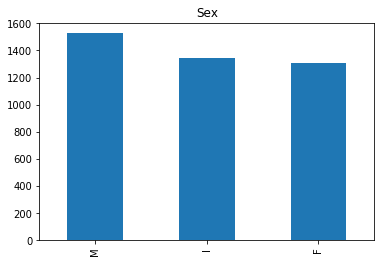

<Figure size 432x288 with 0 Axes>

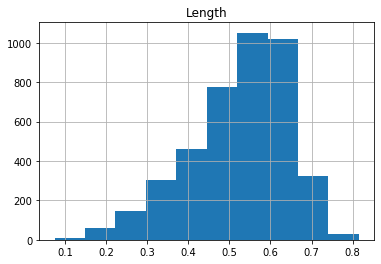

<Figure size 432x288 with 0 Axes>

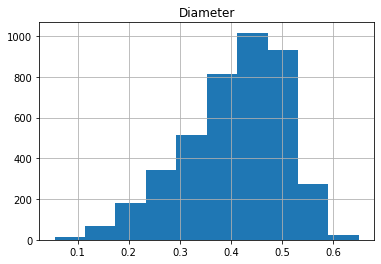

<Figure size 432x288 with 0 Axes>

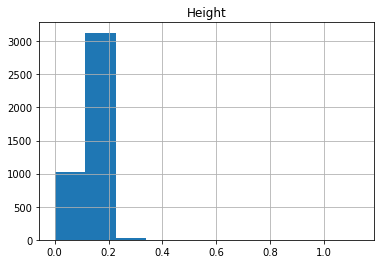

<Figure size 432x288 with 0 Axes>

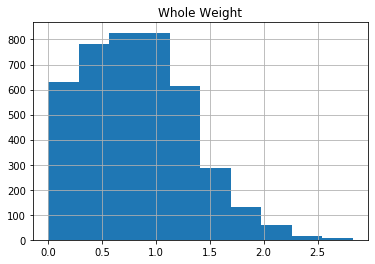

<Figure size 432x288 with 0 Axes>

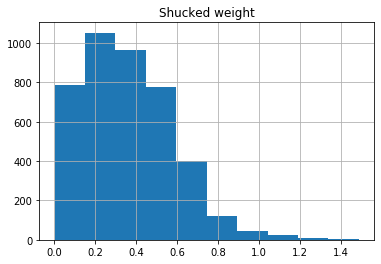

<Figure size 432x288 with 0 Axes>

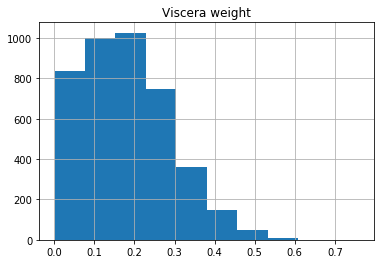

<Figure size 432x288 with 0 Axes>

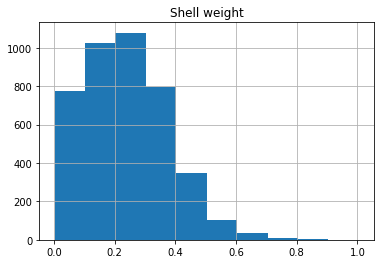

In [4]:
data['Sex'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.figure()
data.hist(column='Length')
plt.figure()
data.hist(column='Diameter')
plt.figure()
data.hist(column='Height')
plt.figure()
data.hist(column='Whole Weight')
plt.figure()
data.hist(column='Shucked weight')
plt.figure()
data.hist(column='Viscera weight')
plt.figure()
data.hist(column='Shell weight')

In [5]:
#one hot encoding for Sex
one_hot = pd.get_dummies(data['Sex']) 
data = data.drop('Sex',axis = 1)
data = data.join(one_hot)

## Data after One Hot Encoding for Discrete Values (Sex)

In [6]:
data

,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## Min-Max Scaling

In [7]:
#min max normalization
for column in data.columns:
    data[column]=(data[column]-data[column].min())/(data[column].max()-data[column].min())

## Splitting Dataset into 90% train 10% test

In [8]:
train_,test=model_selection.train_test_split(data, test_size=0.1, train_size=0.9)

# Note: Training is done using the 5-fold validation. RMSE is reported on the validation set. Best Model from the 5 folds is determined using the RMSE value. Lower the RMSE, better is the model

## Linear Regression w/o Regularization LR=0.00001

In [9]:
def linear(w,x_train,y_train,x_test,y_test):
    lr=0.00001
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    x_test=np.array(x_test)
    y_test=np.array(y_test)
    
    for i in range(x_train.shape[0]): #3007
        grad=0
        for j in range(x_train.shape[1]): #10
            grad=grad+(np.dot(x_train[i],w)-y_train[i])*x_train[i][j]
            w[j]=w[j]-lr*grad
        
    #validation
    y_pred=np.dot(x_test,w)
    mse=np.sqrt(np.sum(np.square(y_pred-y_test)))/x_test.shape[0]
    return(w,mse)

<Figure size 432x288 with 0 Axes>

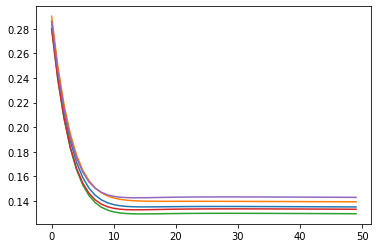

<Figure size 432x288 with 0 Axes>

In [10]:
best_rmse=10000
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)

y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# print(train_.shape)
# print(y.shape)
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    w=np.zeros((x_train.shape[1],1))
#     print(X_train.shape)
#     print(X_test.shape)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    for i in range(50):
        w,mse=linear(w,x_train,y_train,x_test,y_test)
        rmse.append(mse)
    
    plt.plot(rmse)
    if(sum(rmse)<best_rmse):
        w_best=w
        best_rmse=sum(rmse)
plt.figure()

## RMSE for model without penalty on test set

In [11]:
y=test['Rings']
new_test=test.drop(['Rings'],axis=1)
new_test=np.array(new_test)
y_pred=np.dot(new_test,w)
y=np.array(y)
# np.sqrt(np.sum(np.square((y-y_pred))))/y.size
# r2_score(y,y_pred)
np.sqrt(np.sum(np.square(y_pred-y)))/len(y)

0.14695609463470916

## L2 Regularization LR:0.00001 lambda=0.01

### Notice the loss function here. The square of the norm of the weights of the model are added to the loss function.

In [12]:
def l2(w,x_train,y_train,x_test,y_test):
    lr=0.00001
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    x_test=np.array(x_test)
    y_test=np.array(y_test)
    lamb=0.0001
    
    for i in range(x_train.shape[0]): #3007
        grad=0
        for j in range(x_train.shape[1]): #10
            grad=grad+(np.dot(x_train[i],w)-y_train[i])*x_train[i][j] + lamb*w[j]
            w[j]=w[j]-lr*grad
        
    #validation
    y_pred=np.dot(x_test,w)
    mse=(np.sqrt(np.sum(np.square(y_pred-y_test))) + lamb*np.square(np.linalg.norm(w))) /x_test.shape[0]#notice the change in loss function
    return(w,mse)

<Figure size 432x288 with 0 Axes>

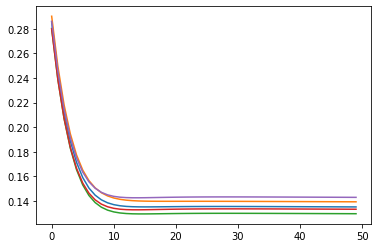

<Figure size 432x288 with 0 Axes>

In [13]:
best_rmse=10000
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)

y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# print(train_.shape)
# print(y.shape)
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    wl2=np.zeros((x_train.shape[1],1))
#     print(X_train.shape)
#     print(X_test.shape)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    for i in range(50):
        wl2,mse=l2(wl2,x_train,y_train,x_test,y_test)
        rmse.append(mse)
    
    plt.plot(rmse)
    if(sum(rmse)<best_rmse):
        w_best_l2=wl2
        best_rmse=sum(rmse)
plt.figure()

## RMSE for L2 on test set

In [14]:
y=test['Rings']
new_test=test.drop(['Rings'],axis=1)
new_test=np.array(new_test)
y_pred=np.dot(new_test,w_best_l2)
y=np.array(y)
# np.sqrt(np.sum(np.square((y-y_pred))))/y.size
# r2_score(y,y_pred)
np.sqrt(np.sum(np.square(y_pred-y)))/len(y)

0.14705283270813393

## L1 Regularization LR:0.00001, lambda=0.001

### Notice the loss function here. The absolute value of the weights of the model are added to the loss function

In [15]:
def l1(w,x_train,y_train,x_test,y_test):
    lr=0.00001
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    x_test=np.array(x_test)
    y_test=np.array(y_test)
    constant=0.5
    lamb=0.001
    
    for i in range(x_train.shape[0]): #3007
        grad=0
        for j in range(x_train.shape[1]): #10
            grad=grad+(np.dot(x_train[i],w)-y_train[i])*x_train[i][j] + lamb*constant
            w[j]=w[j]-lr*grad
        
    #validation
    y_pred=np.dot(x_test,w)
    mse=(np.sqrt(np.sum(np.square(y_pred-y_test))) + lamb*np.sum(np.abs(w)))/x_test.shape[0]#notice the change in loss function here
    return(w,mse)

<Figure size 432x288 with 0 Axes>

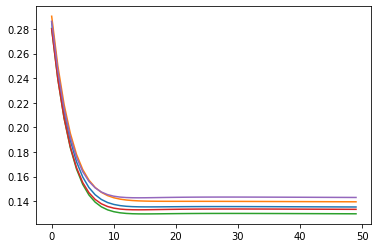

<Figure size 432x288 with 0 Axes>

In [16]:
best_rmse=10000
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)

y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# print(train_.shape)
# print(y.shape)
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    wl1=np.zeros((x_train.shape[1],1))
#     print(X_train.shape)
#     print(X_test.shape)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    for i in range(50):
        wl1,mse=l1(wl1,x_train,y_train,x_test,y_test)
        rmse.append(mse)
    
    plt.plot(rmse)
    if(sum(rmse)<best_rmse):
        w_best_l1=wl1
        best_rmse=sum(rmse)
plt.figure()

## RMSE for L1 on test set

In [17]:
y=test['Rings']
new_test=test.drop(['Rings'],axis=1)
new_test=np.array(new_test)
y_pred=np.dot(new_test,w_best_l1)
y=np.array(y)
# np.sqrt(np.sum(np.square((y-y_pred))))/y.size
np.sqrt(np.sum(np.square(y_pred-y)))/len(y)

0.1471399932030919

## SkLearn implementation of Linear Regression no Penalty

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)


y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# y1=test['Rings']
# new_test=test.drop(['Rings'],axis=1)
# new_test=np.array(new_test)
best_rmse=10000
# print(train_.shape)
# print(y.shape)

for train_index, test_index in kf.split(train_):
#     rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
#     wl1=np.zeros((x_train.shape[1],1))
#     print(X_train.shape)
#     print(X_test.shape)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    rmse=np.sqrt(np.sum(np.square(y_pred-y_test)))/len(y_pred)
#     print(rmse)
    if(rmse<best_rmse):
        best_rmse=rmse
        best_model=reg
#     print(reg.score(new_test,y1))

y=test['Rings']
new_test=test.drop(['Rings'],axis=1)   


## RMSE for inbuilt Linear Regression on test set

In [19]:
from sklearn.metrics import mean_squared_error

y=test['Rings']
new_test=test.drop(['Rings'],axis=1)  
y_pred=best_model.predict(new_test)
rms = mean_squared_error(y, y_pred,squared=False)
rms

0.08471284911075605

## SkLearn Implementation of Ridge  (L2)

In [20]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.000001)
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)


y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# y1=test['Rings']
# new_test=test.drop(['Rings'],axis=1)
# new_test=np.array(new_test)
best_rmse=10000
# print(train_.shape)
# print(y.shape)

for train_index, test_index in kf.split(train_):
#     rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
#     wl1=np.zeros((x_train.shape[1],1))
#     print(X_train.shape)
#     print(X_test.shape)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    rmse=np.sqrt(np.sum(np.square(y_pred-y_test)))/len(y_pred)
#     print(rmse)
    if(rmse<best_rmse):
        best_rmse=rmse
        best_model=reg
#     print(reg.score(new_test,y1))

y=test['Rings']
new_test=test.drop(['Rings'],axis=1)   


## RMSE for Ridge on test set

In [21]:
from sklearn.metrics import mean_squared_error

y=test['Rings']
new_test=test.drop(['Rings'],axis=1)  
y_pred=best_model.predict(new_test)
rms = mean_squared_error(y, y_pred,squared=False)
rms

0.08471285141421189

## SkLearn Implementation of Lasso (L1)

In [22]:
from sklearn.linear_model import Lasso
reg=Lasso(alpha=0.00001)
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)


y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# y1=test['Rings']
# new_test=test.drop(['Rings'],axis=1)
# new_test=np.array(new_test)
best_rmse=10000
# print(train_.shape)
# print(y.shape)

for train_index, test_index in kf.split(train_):
#     rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
#     wl1=np.zeros((x_train.shape[1],1))
#     print(X_train.shape)
#     print(X_test.shape)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    rmse=np.sqrt(np.sum(np.square(y_pred-y_test)))/len(y_pred)
#     print(rmse)
    if(rmse<best_rmse):
        best_rmse=rmse
        best_model=reg
#     print(reg.score(new_test,y1))

y=test['Rings']
new_test=test.drop(['Rings'],axis=1)   


## RMSE for Lasso on test set

In [23]:
from sklearn.metrics import mean_squared_error

y=test['Rings']
new_test=test.drop(['Rings'],axis=1)  
y_pred=best_model.predict(new_test)
rms = mean_squared_error(y, y_pred,squared=False)
rms

0.08480590164862717

### The introduction of penalty (L1 and L2) does not seem to have much effect on the RMSE value. After running multiple runs of this code, no conclusive best model can be found. Sometimes L1 performs the best, sometimes L2 and sometimes no penalty is the best model. The RMSE values are very close to each other.

### The inbuilt regression models give slightly lower RMSE (about 0.06)

## Closed Form RMSE on validation set

In [24]:
kf=model_selection.KFold(n_splits=5)
y = train_['Rings']
new_train = train_.drop(['Rings'], axis=1)
# y1=test['Rings']
# new_test=test.drop(['Rings'],axis=1)
# new_test=np.array(new_test)

idx=1
for train_index, test_index in kf.split(train_):
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    w=np.dot(np.linalg.inv(np.dot(np.transpose(x_train),x_train)),np.dot(np.transpose(x_train),y_train))
    
    y_pred=np.dot(x_test,w)
    y_test=np.array(y_test)
    print("RMSE of fold "+str(idx)+":",np.sqrt(np.sum(np.square(y_pred-y_test)))/len(y_test))
    idx+=1

    
    

RMSE of fold 1: 0.0027954060476873955
RMSE of fold 2: 0.003147262374071904
RMSE of fold 3: 0.002681020281461619
RMSE of fold 4: 0.0026932049414070255
RMSE of fold 5: 0.0029880871585471888
